In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## The objective of this project is to develop a machine learning model that can predict the risk of a heart attack based on a set of medical and demographic variables. The model will be trained on historical patient data and will aim to provide accurate predictions to aid healthcare professionals in assessing patient risk.

**Loading The Datasets**

In [2]:
df = pd.read_excel("data.xlsx")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Shape of the Datasets**

In [3]:
print("The Number of Rows present in the Datasets are : ", df.shape[0])
print("The Number of Columns present in the Datasets are : ", df.shape[1])

The Number of Rows present in the Datasets are :  302
The Number of Columns present in the Datasets are :  14


**Dataset Info**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


**Checking for Null Values**

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Our dataset contains no Null values.**

**Statistical Analysis**

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


**Insights:**

* Patients age are in range min 29 years to max 77 years.
* Resting blood pressure varies from 94 mm Hg to 200 mm Hg.
* Serum cholesterol level are ranging from 126 mg/dl to 564 mg/dl.
* Maximum heart rate achieved is 202.

**Categorical Variable Count**

In [7]:
cat_col = ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']
for col in cat_col:
    print(df[col].value_counts())
    print("----------------------")

sex
1    206
0     96
Name: count, dtype: int64
----------------------
cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64
----------------------
fbs
0    257
1     45
Name: count, dtype: int64
----------------------
restecg
1    151
0    147
2      4
Name: count, dtype: int64
----------------------
exang
0    203
1     99
Name: count, dtype: int64
----------------------
slope
2    141
1    140
0     21
Name: count, dtype: int64
----------------------
ca
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64
----------------------
thal
2    165
3    117
1     18
0      2
Name: count, dtype: int64
----------------------
target
1    164
0    138
Name: count, dtype: int64
----------------------


**Check for Duplicates**

In [8]:
print("The number of Duplicate Rows present in the Dataset : ",df.duplicated().sum())

The number of Duplicate Rows present in the Dataset :  0


**Outlier Detection**

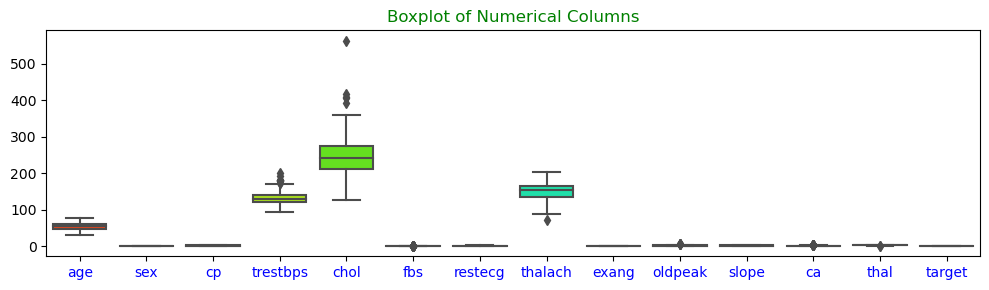

In [9]:
plt.figure(figsize=(10,3))
sns.boxplot(df,palette='gist_rainbow')
plt.title("Boxplot of Numerical Columns",color='green')
plt.xticks(color='blue')
plt.tight_layout()
plt.show()

**Insights:**

* Outliers are present in 'trestbps' ,'chol' & 'thalac' columns.

In [10]:
cat_col = []
cont_col = []
for col in df.columns:
    if df[col].nunique() <= 10:
        cat_col.append(col)
    else:
        cont_col.append(col)

In [11]:
print("Continuous columns : ",cont_col)
print("Categorical columns : ",cat_col)

Continuous columns :  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Categorical columns :  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


**Distribution of Continuous Variable**

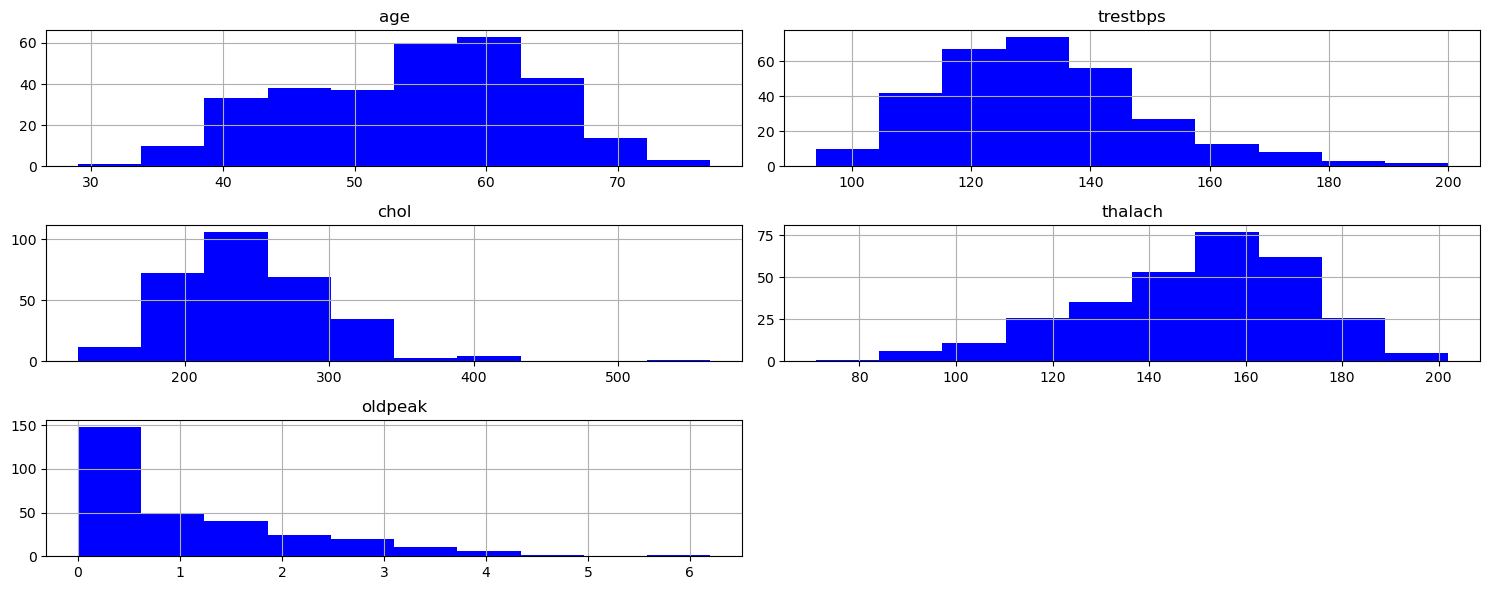

In [12]:
df.hist(cont_col,figsize=(15,6),color='blue')
#sns.histplot(df)
plt.tight_layout()
plt.show()

**Insights**

* All the Continuous variable are Skewed (either left or right).

## Exploratory Data Analysis

### Univariate Analysis

##### Age Distribution

<Axes: xlabel='age', ylabel='Count'>

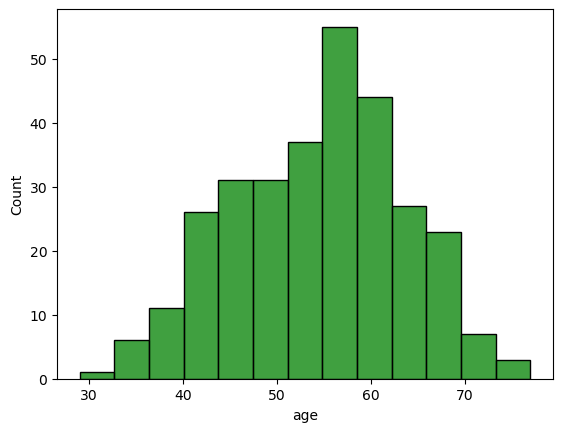

In [17]:
sns.histplot(df['age'],color='green')

* Maximum Patients are in the Age Group betewwn 50 & 60 years.

<Figure size 500x300 with 0 Axes>

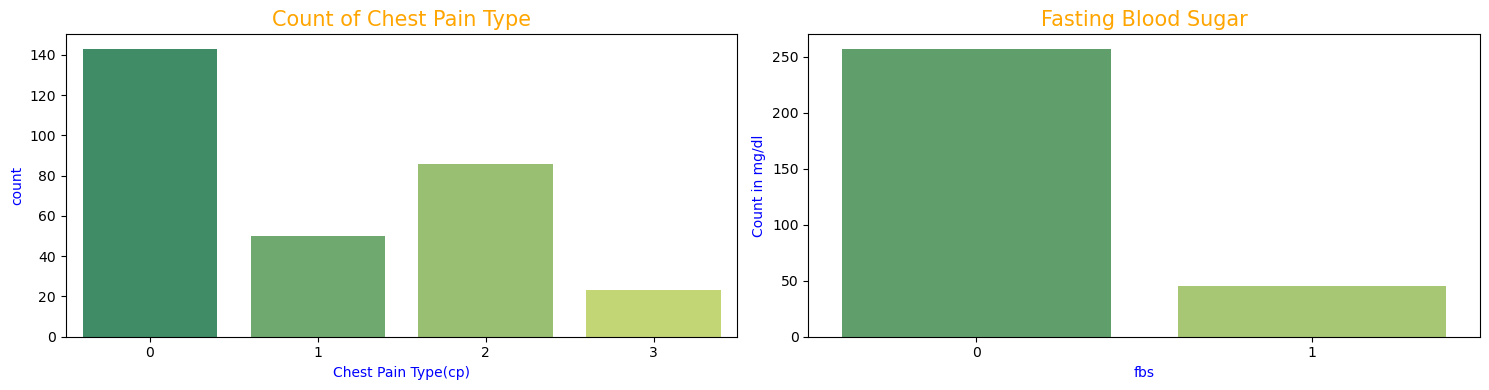

In [14]:
plt.figure(figsize=(5,3))
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15,4)
ax=sns.countplot(x=df['cp'],palette='summer',ax=axes[0])
ax.set_title("Count of Chest Pain Type",color='orange',fontsize=15)
ax.set_xlabel("Chest Pain Type(cp)",color='blue')
ax.set_ylabel("count",color='blue')
ax1 = sns.countplot(x=df['fbs'],ax=axes[1],palette='summer')
ax1.set_title("Fasting Blood Sugar",color='orange',fontsize=15)
ax1.set_xlabel("fbs",color='blue')
ax1.set_ylabel("Count in mg/dl",color='blue')
# ax1.set_legend(labels=["1 : fasting blood sugar > 120", "0 : otherwise"])
plt.tight_layout()
plt.show()



#plt.xticks(color='purple')
#plt.yticks(color='purple')



**Insights:**

* Maximum Patients suffer from type-0 chest pain. This is the most common chest pain type.
* Very few patients have fbs > 120 mg/dl.

<Figure size 500x300 with 0 Axes>

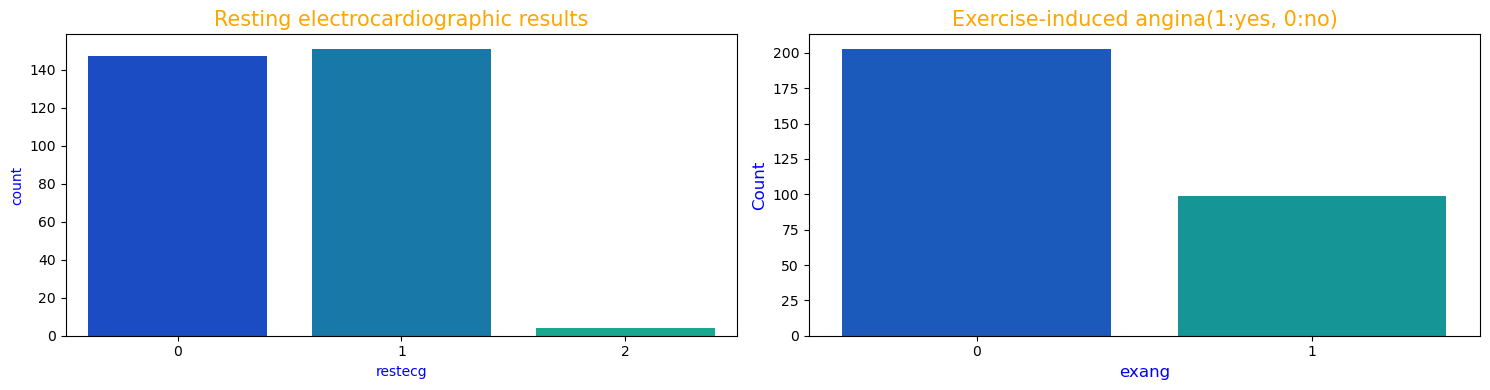

In [15]:
plt.figure(figsize=(5,3))
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15,4)
ax=sns.countplot(x=df['restecg'],palette='winter',ax=axes[0])
ax.set_title("Resting electrocardiographic results",color='orange',fontsize=15)
ax.set_xlabel("restecg",color='blue')
ax.set_ylabel("count",color='blue')
ax1 = sns.countplot(x=df['exang'],ax=axes[1],palette='winter')
ax1.set_title("Exercise-induced angina(1:yes, 0:no)",color='orange',fontsize=15)
ax1.set_xlabel("exang",color='blue',fontsize=12)
ax1.set_ylabel("Count",color='blue',fontsize=12)
# ax1.set_legend(labels=["1 : fasting blood sugar > 120", "0 : otherwise"])
plt.tight_layout()
plt.show()


<Figure size 500x300 with 0 Axes>

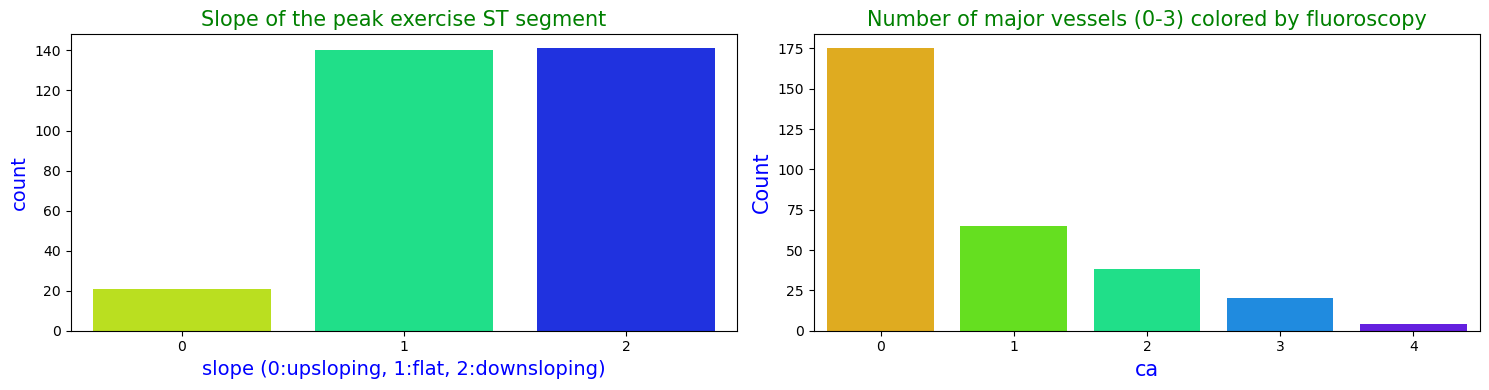

In [16]:
plt.figure(figsize=(5,3))
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15,4)
ax=sns.countplot(x=df['slope'],palette='gist_rainbow',ax=axes[0])
ax.set_title("Slope of the peak exercise ST segment",color='green',fontsize=15)
ax.set_xlabel("slope (0:upsloping, 1:flat, 2:downsloping)",color='blue',fontsize=14)
ax.set_ylabel("count",color='blue',fontsize=14)
ax1 = sns.countplot(x=df['ca'],ax=axes[1],palette='gist_rainbow')
ax1.set_title("Number of major vessels (0-3) colored by fluoroscopy",color='green',fontsize=15)
ax1.set_xlabel("ca",color='blue',fontsize=15)
ax1.set_ylabel("Count",color='blue',fontsize=15);
# ax1.set_legend(labels=["1 : fasting blood sugar > 120", "0 : otherwise"])
plt.tight_layout()
plt.show()


<Figure size 500x300 with 0 Axes>

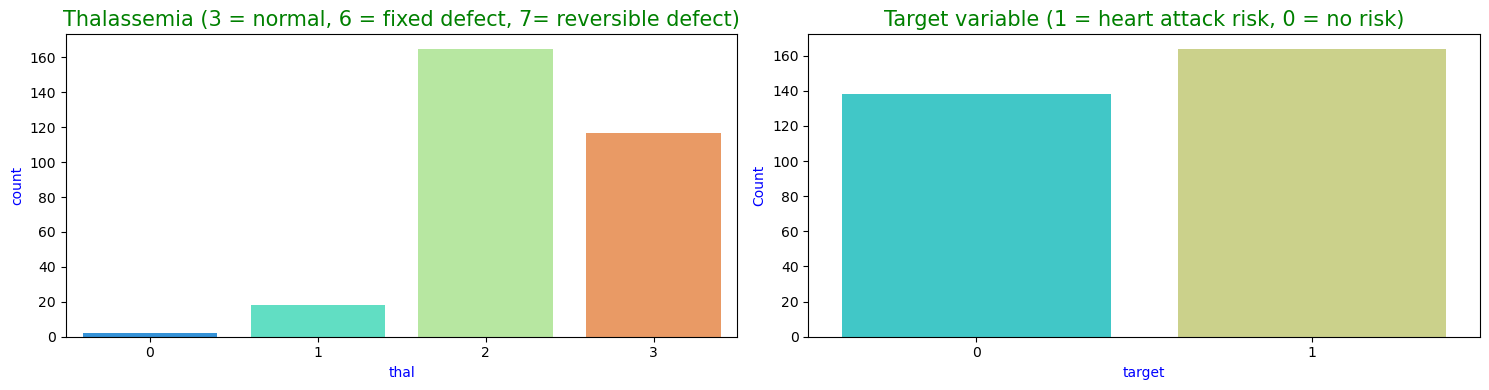

In [17]:
plt.figure(figsize=(5,3))
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15,4)
ax=sns.countplot(x=df['thal'],palette='rainbow',ax=axes[0])
ax.set_title("Thalassemia (3 = normal, 6 = fixed defect, 7= reversible defect)",color='green',fontsize=15)
ax.set_xlabel("thal",color='blue')
ax.set_ylabel("count",color='blue')
ax1 = sns.countplot(x=df['target'],ax=axes[1],palette='rainbow')
ax1.set_title("Target variable (1 = heart attack risk, 0 = no risk)",color='green',fontsize=15)
ax1.set_xlabel("target",color='blue')
ax1.set_ylabel("Count",color='blue');
# ax1.set_legend(labels=["1 : fasting blood sugar > 120", "0 : otherwise"])
plt.tight_layout()
plt.show()


**Maximum Heart Rate Distribution**

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


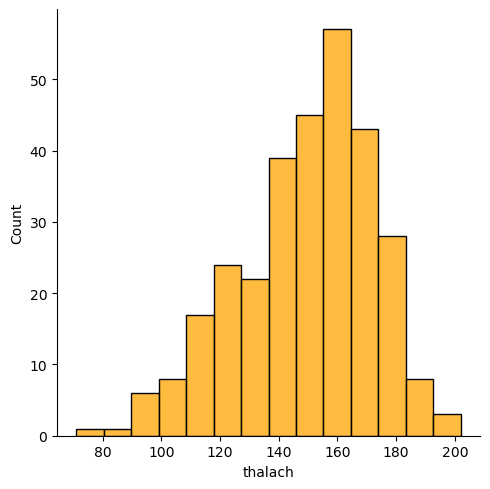

In [18]:
sns.displot(df['thalach'],color='orange')
plt.show()

* Maximum patients have Heart Rate in range 160 - 166.

**Serum Cholestrol Distribution**

<Axes: >

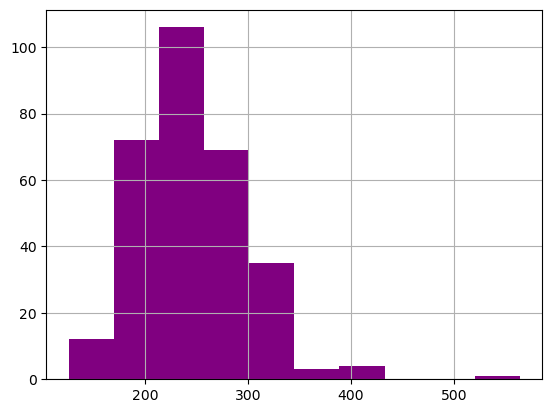

In [19]:
df['chol'].hist(color='purple')

**Resting Blood Pressure Distribution**

<Axes: >

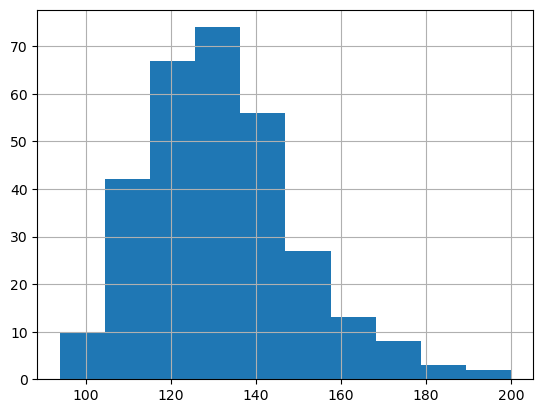

In [20]:
df['trestbps'].hist()

* Resting Blood Pressure is between 120-130

## Bivariate Analysis

In [22]:
df.groupby(['target','age'])['age'].count()

target  age
0       35     2
        38     1
        39     1
        40     2
        41     1
              ..
1       69     2
        70     1
        71     3
        74     1
        76     1
Name: age, Length: 75, dtype: int64

In [23]:
df[df['target']==1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1


<Axes: xlabel='age', ylabel='Count'>

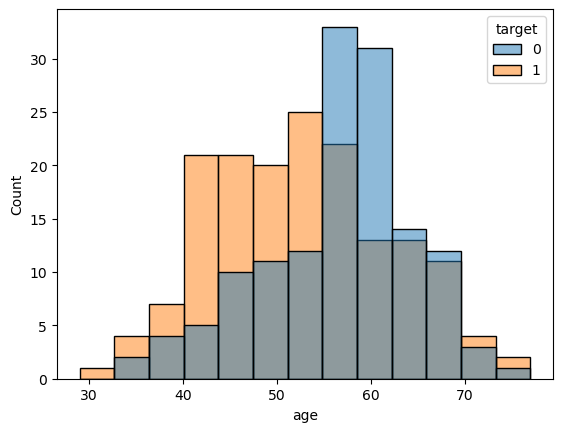

In [16]:
sns.histplot(x='age',data=df,color='green',hue='target')

<Figure size 500x300 with 0 Axes>

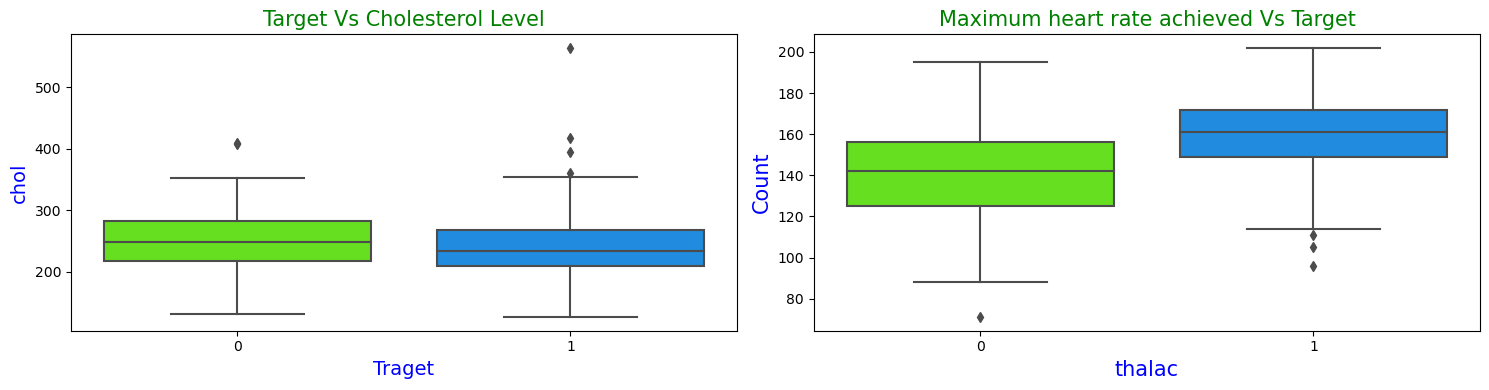

In [21]:
plt.figure(figsize=(5,3))
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15,4)
ax=sns.boxplot(x=df['target'],y=df['chol'],palette='gist_rainbow',ax=axes[0])
ax.set_title("Target Vs Cholesterol Level",color='green',fontsize=15)
ax.set_xlabel("Traget",color='blue',fontsize=14)
ax.set_ylabel("chol",color='blue',fontsize=14)
ax1 = sns.boxplot(x=df['target'],y=df['thalach'],ax=axes[1],palette='gist_rainbow')
ax1.set_title("Maximum heart rate achieved Vs Target",color='green',fontsize=15)
ax1.set_xlabel("thalac",color='blue',fontsize=15)
ax1.set_ylabel("Count",color='blue',fontsize=15);
# ax1.set_legend(labels=["1 : fasting blood sugar > 120", "0 : otherwise"])
plt.tight_layout()
plt.show()

#plt.xticks(color='purple',fontsize=8)
#plt.yticks(color='purple',fontsize=8);
plt.show()

**Insights:**

* Cholestrol levels is almost same for both Heart patients non-heart patients.
* Heart disease patient achieves more heart rate.

**Target Vs Sex**

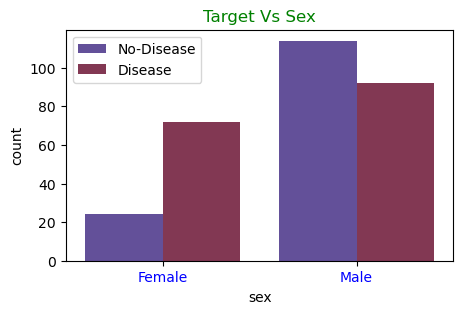

In [22]:
plt.figure(figsize=(5,3))
sns.countplot(x='sex',hue='target',data=df,palette='twilight')
plt.xticks([1,0],['Male','Female'],color='blue')
plt.title("Target Vs Sex",color='green')
plt.legend(labels=['No-Disease','Disease'])
plt.show()

**Insights:**

* Many Female patients are at a risk of heart disease.
* There are more male patients with no risk of heart disease. 
* Overall Male patients are more at risk.

**Target Vs Chest pain Type**

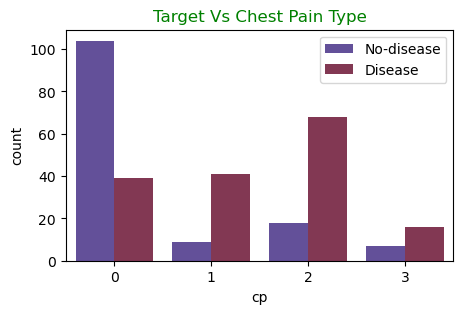

In [23]:
plt.figure(figsize=(5,3))
sns.countplot(x=df['cp'],hue='target',data=df,palette='twilight')
plt.title("Target Vs Chest Pain Type",color='green')
plt.legend(labels=['No-disease','Disease'])
plt.show()

* We saw that Maximum Heart Disease occur with type-2 chest pain.
* It seems this is the severe chest pain and possibly causing heart disease.


**Target Vs Fasting Blood Sugar**

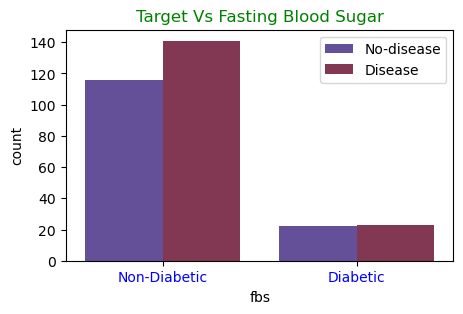

In [24]:
plt.figure(figsize=(5,3))
sns.countplot(x=df['fbs'],hue='target',data=df,palette='twilight')
plt.title("Target Vs Fasting Blood Sugar",color='green')
plt.xticks([0,1],['Non-Diabetic','Diabetic'],color='blue')
plt.legend(labels=['No-disease','Disease'])
plt.show()

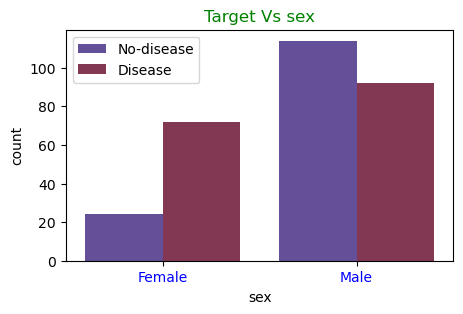

In [24]:
plt.figure(figsize=(5,3))
sns.countplot(x=df['sex'],hue='target',data=df,palette='twilight')
plt.title("Target Vs sex",color='green')
plt.xticks([0,1],['Female','Male'],color='blue')
plt.legend(labels=['No-disease','Disease'])
plt.show()

**Insights:**

* Non-Diabetic patients are more at a Risk of Heart disease.
* It might be due to as Diabetic patients are already on a controlled diet so their risk of Heart Disease is Low.

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


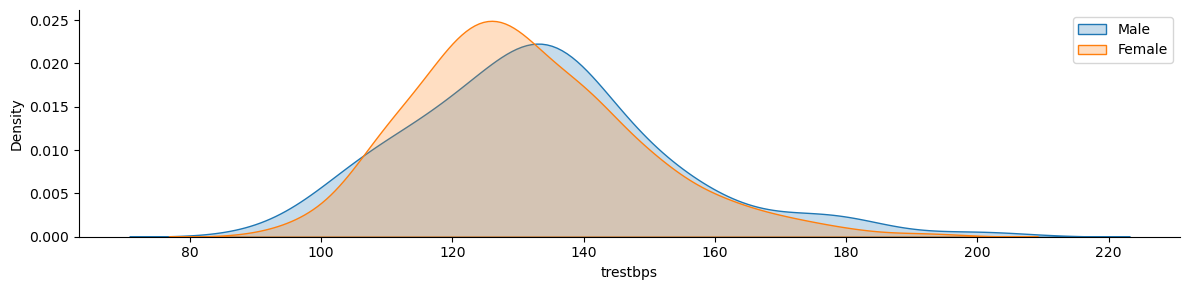

In [25]:
g = sns.FacetGrid(data=df,hue='sex',aspect=4)
g.map(sns.kdeplot,'trestbps',fill=True)
plt.legend(labels=['Male','Female'])
g.tight_layout()
plt.show()

* Female has lower resting Bloop Pressure as compared to men.
* For female it is around 120 and for male it is around 140.

**Correlations Heatmap**

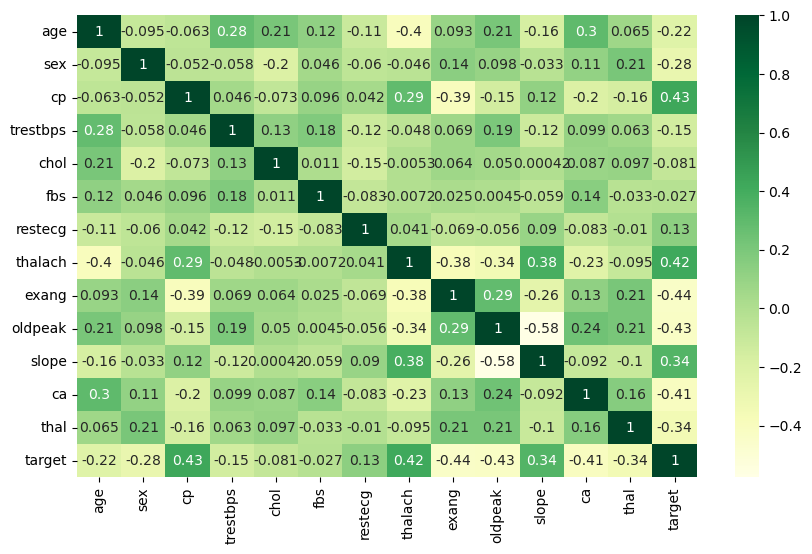

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='YlGn')
plt.show()

* cp is positively correlated with target varial which is obvious as chest pain is related to Heart disease.
* thalac is correlated with Target as Maximum Heart rate achieved can cause Heart Disease.

### Outlier Treatment

In [221]:
# Define a function which returns the Upper and Lower limit to detect outliers for each feature.
def remove_outlier(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [222]:
# Cap & floor the values beyond the outlier boundaries

#feature_list=ad_num.columns
for i in cont_col:
    LL,UL = remove_outlier(df[i])
    df[i] = np.where(df[i] > UL,UL,df[i])
    df[i] = np.where(df[i] < LL,LL,df[i])

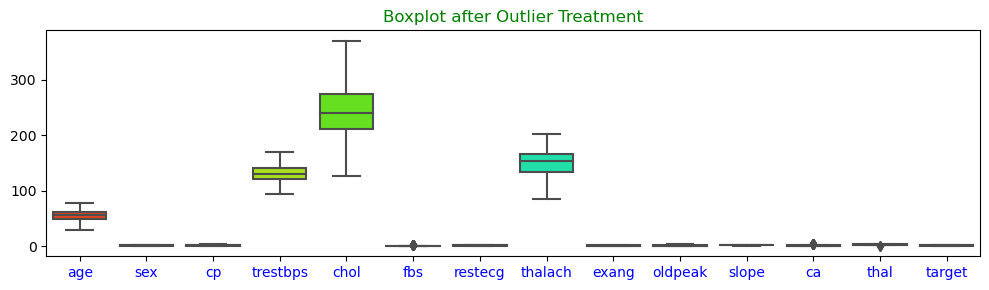

In [223]:
plt.figure(figsize=(10,3))
sns.boxplot(df,palette='gist_rainbow')
plt.title("Boxplot after Outlier Treatment",color='green')
plt.xticks(color='blue')
plt.tight_layout()
plt.show()

#### Encoding Categoriacl Variables

In [224]:
cat_col

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [225]:
df = pd.get_dummies(df,columns=['cp','fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'],drop_first=True)

In [226]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63.0,1,145.0,233.0,150.0,2.3,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37.0,1,130.0,250.0,187.0,3.5,1,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41.0,0,130.0,204.0,172.0,1.4,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56.0,1,120.0,236.0,178.0,0.8,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57.0,0,120.0,354.0,163.0,0.6,1,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [227]:
df.columns


Index(['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [228]:
df[['cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3']]  = df[['cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3']].replace({True : 1, False :0})


In [229]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63.0,1,145.0,233.0,150.0,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37.0,1,130.0,250.0,187.0,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41.0,0,130.0,204.0,172.0,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56.0,1,120.0,236.0,178.0,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57.0,0,120.0,354.0,163.0,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        302 non-null    float64
 1   sex        302 non-null    int64  
 2   trestbps   302 non-null    float64
 3   chol       302 non-null    float64
 4   thalach    302 non-null    float64
 5   oldpeak    302 non-null    float64
 6   target     302 non-null    int64  
 7   cp_1       302 non-null    int64  
 8   cp_2       302 non-null    int64  
 9   cp_3       302 non-null    int64  
 10  fbs_1      302 non-null    int64  
 11  restecg_1  302 non-null    int64  
 12  restecg_2  302 non-null    int64  
 13  exang_1    302 non-null    int64  
 14  slope_1    302 non-null    int64  
 15  slope_2    302 non-null    int64  
 16  ca_1       302 non-null    int64  
 17  ca_2       302 non-null    int64  
 18  ca_3       302 non-null    int64  
 19  ca_4       302 non-null    int64  
 20  thal_1    

#### Feature Scaling

In [231]:
from sklearn.preprocessing import StandardScaler

In [232]:
cont_col

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [233]:
st = StandardScaler()
df_scaled = pd.DataFrame(st.fit_transform(df[cont_col]),columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])

In [234]:
#df_scaled = pd.DataFrame(df_scaled,columns=cont_col)
df_scaled.head()

,age,trestbps,chol,thalach,oldpeak
0,0.949794,0.828927,-0.261076,0.017027,1.147606
1,-1.928548,-0.075902,0.097514,1.644957,2.230096
2,-1.485726,-0.075902,-0.872787,0.984985,0.335739
3,0.174856,-0.679121,-0.197795,1.248974,-0.205506
4,0.285561,-0.679121,2.291236,0.589003,-0.385921


In [235]:
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [236]:
df_scaled_nw = pd.concat([df_scaled,df[['sex','cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3','target']]],axis=1)
df_scaled_nw.head()

,age,trestbps,chol,thalach,oldpeak,sex,cp_1,cp_2,cp_3,fbs_1,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target
0,0.949794,0.828927,-0.261076,0.017027,1.147606,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
1,-1.928548,-0.075902,0.097514,1.644957,2.230096,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,-1.485726,-0.075902,-0.872787,0.984985,0.335739,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,0.174856,-0.679121,-0.197795,1.248974,-0.205506,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,0.285561,-0.679121,2.291236,0.589003,-0.385921,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


### Train - Test Split


In [237]:
X = df_scaled_nw.drop('target',axis=1)
y = df_scaled_nw['target']

In [238]:
X.head(1)

,age,trestbps,chol,thalach,oldpeak,sex,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,0.828927,-0.261076,0.017027,1.147606,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0


In [239]:
from sklearn.model_selection import train_test_split

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4,stratify=y)

In [241]:
print("Shape of X_train : ",X_train.shape)
print("Shape of X_test : ",X_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test : ",y_test.shape)

Shape of X_train :  (241, 22)
Shape of X_test :  (61, 22)
Shape of y_train :  (241,)
Shape of y_test :  (61,)


## Model Building

#### Logistic Regression Model

In [242]:
from sklearn.linear_model import LogisticRegression

In [243]:
lgt = LogisticRegression(random_state=4)
lgt.fit(X_train,y_train)

LogisticRegression(random_state=4)

##### Accuracy of Training and Test Data.

In [244]:
print("Accuracy of the Training Data: ",lgt.score(X_train,y_train))
print("Accuracy of the Test Data: ",lgt.score(X_test,y_test))

Accuracy of the Training Data:  0.8713692946058091
Accuracy of the Test Data:  0.8524590163934426


In [245]:
ypred_train = lgt.predict(X_train)
ypred_test = lgt.predict(X_test)

In [246]:
from sklearn.metrics import accuracy_score

In [247]:
accuracy_score(y_test,ypred_test)

0.8524590163934426

In [248]:
accuracy_score(y_train,ypred_train)

0.8713692946058091

#### Comparison Table

In [249]:
resultsDf = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test)},index=['Logistic Regression'])
resultsDf

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.871369,0.852459


### Applying GridSearchCV for Logistic Regression:

In [250]:
from sklearn.model_selection import GridSearchCV

In [251]:
grid = {'penalty':['l2'],
        'solver':['newton-cg','liblinear','lbfgs','sag'],
        'tol':[0.0001,0.00001]}

In [252]:
grid_search = GridSearchCV(estimator=lgt,param_grid=grid,cv=10,n_jobs=-1,scoring='f1',verbose=1)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=4), n_jobs=-1,
             param_grid={'penalty': ['l2'],
                         'solver': ['newton-cg', 'liblinear', 'lbfgs', 'sag'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1', verbose=1)

In [253]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(random_state=4, solver='newton-cg')


**Building model on Best parameters**

In [254]:
best_model_lgt = grid_search.best_estimator_
best_model_lgt.fit(X_train,y_train)

LogisticRegression(random_state=4, solver='newton-cg')

**Accuracy of Train and Test data**

In [255]:
print("Accuracy on Train Data: ",best_model_lgt.score(X_train,y_train))
print("Accuracy on Test Data: ",best_model_lgt.score(X_test,y_test))

Accuracy on Train Data:  0.8713692946058091
Accuracy on Test Data:  0.8524590163934426


In [256]:
ypred_train = best_model_lgt.predict(X_train)
ypred_test = best_model_lgt.predict(X_test)

In [257]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test)},index=['Logistic Regression Tuned'])
comp_table = pd.concat([resultsDf,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.871369,0.852459
Logistic Regression Tuned,0.871369,0.852459


#### Linear Discriminant Analysis

In [258]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [259]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

#### Accuracy of Train and Test data:

In [260]:
print("Accuracy of the Training Data: ",lda.score(X_train,y_train))
print("Accuracy of the Test Data: ",lda.score(X_test,y_test))

Accuracy of the Training Data:  0.8672199170124482
Accuracy of the Test Data:  0.8852459016393442


In [261]:
ypred_train = lda.predict(X_train)
ypred_test = lda.predict(X_test)

In [262]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test)},index=['LDA'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.871369,0.852459
Logistic Regression Tuned,0.871369,0.852459
LDA,0.867220,0.885246


### Building LDA model using GridSearchCV

In [263]:
param_grid = { 'solver': [ 'lsqr', 'eigen'],
               'tol' : [0.0001,0.0002,0.0003],
               'shrinkage' : ['auto', 'None'],
    
              }    

In [264]:
grid_search = GridSearchCV(estimator = lda, param_grid = param_grid, cv = 10, n_jobs=-1,scoring='f1')
grid_search.fit(X_train,y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py", line 571, in fit
    self._validate_params()
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\USER\anaconda3\Lib\site-packag

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', 'None'],
                         'solver': ['lsqr', 'eigen'],
                         'tol': [0.0001, 0.0002, 0.0003]},
             scoring='f1')

In [265]:
# getting best parameters used out of all the combinations given in grid search
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001}
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')


**Building model on Best parameters**

In [266]:
best_model_lda = grid_search.best_estimator_
best_model_lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')

In [267]:
print("Accuracy on Train Data: ",best_model_lda.score(X_train,y_train))
print("Accuracy on Test Data: ",best_model_lda.score(X_test,y_test))

Accuracy on Train Data:  0.8506224066390041
Accuracy on Test Data:  0.819672131147541


In [268]:
ypred_train = best_model_lda.predict(X_train)
ypred_test = best_model_lda.predict(X_test)

In [269]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test)},index=['LDA Tuned'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.871369,0.852459
Logistic Regression Tuned,0.871369,0.852459
LDA,0.867220,0.885246
LDA Tuned,0.850622,0.819672


### Support Vector Classifier (SVC)

In [270]:
from sklearn import svm

In [271]:
svc = svm.SVC(kernel='linear',random_state=4)
svc.fit(X_train,y_train)

SVC(kernel='linear', random_state=4)

##### Accuracy of Train and Test data:

In [272]:
print("Accuracy of the Training Data: ",svc.score(X_train,y_train))
print("Accuracy of the Test Data: ",svc.score(X_test,y_test))

Accuracy of the Training Data:  0.8589211618257261
Accuracy of the Test Data:  0.8524590163934426


In [273]:
ypred_train = svc.predict(X_train)
ypred_test = svc.predict(X_test)

In [274]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test)},index=['Support Vector Classifier'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.871369,0.852459
Logistic Regression Tuned,0.871369,0.852459
LDA,0.867220,0.885246
LDA Tuned,0.850622,0.819672
Support Vector Classifier,0.858921,0.852459


### Applying GridsearchCV on SVM

In [275]:
param_grid = {
               'kernel': ['linear','rbf','poly'],
               'C': [0.01,0.1,1,10],
               'gamma': [0.01,0.1,0.2],
               'degree': [2,3],
    
             }

In [276]:
grid_search = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 5, n_jobs=-1,scoring='f1')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=4), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [2, 3],
                         'gamma': [0.01, 0.1, 0.2],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='f1')

In [277]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'C': 10, 'degree': 2, 'gamma': 0.01, 'kernel': 'linear'} 

SVC(C=10, degree=2, gamma=0.01, kernel='linear', random_state=4)


**Building model on Best parameters**

In [278]:
best_model_svc = grid_search.best_estimator_
best_model_svc.fit(X_train,y_train)

SVC(C=10, degree=2, gamma=0.01, kernel='linear', random_state=4)

In [279]:
print("Accuracy on Train Data: ",best_model_svc.score(X_train,y_train))
print("Accuracy on Test Data: ",best_model_svc.score(X_test,y_test))

Accuracy on Train Data:  0.8796680497925311
Accuracy on Test Data:  0.8688524590163934


In [280]:
ypred_train = best_model_svc.predict(X_train)
ypred_test = best_model_svc.predict(X_test)

In [281]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test)},index=['SVC Tuned'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.871369,0.852459
Logistic Regression Tuned,0.871369,0.852459
LDA,0.867220,0.885246
LDA Tuned,0.850622,0.819672
Support Vector Classifier,0.858921,0.852459
SVC Tuned,0.879668,0.868852


### K-nearest Neighbour (KNN Model)

In [282]:
from sklearn.neighbors import KNeighborsClassifier

In [283]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [284]:
print("Accuracy Score for Training Data is: ", knn.score(X_train, y_train))
print("Accuracy Score for Test Data is: ", knn.score(X_test, y_test))


Accuracy Score for Training Data is:  0.8423236514522822
Accuracy Score for Test Data is:  0.8688524590163934


In [285]:
score = []
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    ypred = knn.predict(X_test)
    score.append(accuracy_score(y_test,ypred))

In [286]:
score

[0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8852459016393442,
 0.8688524590163934,
 0.8032786885245902,
 0.8360655737704918,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.819672131147541,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934]

In [287]:
knn_4 = KNeighborsClassifier(n_neighbors=4)
knn_4.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [288]:
print("Accuracy Score for Training Data is: ", knn_4.score(X_train, y_train))
print("Accuracy Score for Test Data is: ", knn_4.score(X_test, y_test))


Accuracy Score for Training Data is:  0.8589211618257261
Accuracy Score for Test Data is:  0.8852459016393442


In [289]:
ypred_train = knn_4.predict(X_train)
ypred_test = knn_4.predict(X_test)

In [290]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test)},index=['KNN_4'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.871369,0.852459
Logistic Regression Tuned,0.871369,0.852459
LDA,0.867220,0.885246
LDA Tuned,0.850622,0.819672
Support Vector Classifier,0.858921,0.852459
SVC Tuned,0.879668,0.868852
KNN_4,0.858921,0.885246


In [291]:
from sklearn.model_selection import cross_val_score

k_range = list(range(1, 25))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7310752688172043, 0.7583870967741935, 0.7912903225806451, 0.7849462365591398, 0.7946236559139785, 0.7913978494623656, 0.8011827956989247, 0.7815053763440859, 0.7945161290322581, 0.7846236559139783, 0.7879569892473117, 0.7813978494623657, 0.7779569892473118, 0.7813978494623657, 0.7946236559139785, 0.784731182795699, 0.7946236559139785, 0.7813978494623656, 0.7879569892473117, 0.784731182795699, 0.7846236559139784, 0.784731182795699, 0.7846236559139784, 0.7848387096774194]


### GridSearchCV for KNearestNeighbours(KNN):

In [292]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [293]:
knn_grid = {'n_neighbors': list(range(1,10)),'weights':['uniform', 'distance'],
            'metric':['minkowski','euclidean','manhattan'],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search = GridSearchCV(estimator=knn_4,param_grid=knn_grid,cv=10)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=4),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [294]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
KNeighborsClassifier(metric='manhattan', n_neighbors=9)


In [295]:
best_model_knn = grid_search.best_estimator_
best_model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [296]:
print("Accuracy Score for Training Data is: ", best_model_knn.score(X_train, y_train))
print("Accuracy Score for Test Data is: ", best_model_knn.score(X_test, y_test))

Accuracy Score for Training Data is:  0.8423236514522822
Accuracy Score for Test Data is:  0.8524590163934426


In [297]:
ypred_train = best_model_knn.predict(X_train)
ypred_test = best_model_knn.predict(X_test)

In [298]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test)},index=['KNN Tuned'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.871369,0.852459
Logistic Regression Tuned,0.871369,0.852459
LDA,0.867220,0.885246
LDA Tuned,0.850622,0.819672
Support Vector Classifier,0.858921,0.852459
SVC Tuned,0.879668,0.868852
KNN_4,0.858921,0.885246
KNN Tuned,0.842324,0.852459


### Decission Tree Classifier

In [300]:
df = pd.read_excel("data.xlsx")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [301]:
X = df.drop('target',axis=1)
y = df['target']

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4,stratify=y)

In [303]:
print("Shape of X_train :",X_train.shape)
print("Shape of X_test :",X_test.shape)
print("Shape of y_train :",y_train.shape)
print("Shape of y_test :",y_test.shape)

Shape of X_train : (241, 13)
Shape of X_test : (61, 13)
Shape of y_train : (241,)
Shape of y_test : (61,)


In [304]:
from sklearn.tree import DecisionTreeClassifier

In [305]:
dt = DecisionTreeClassifier(random_state=4)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=4)

**Accuracy of the Train and Test data**

In [306]:
print("Accuracy Score for Training Data is: ", dt.score(X_train, y_train))
print("Accuracy Score for Test Data is: ", dt.score(X_test, y_test))

Accuracy Score for Training Data is:  1.0
Accuracy Score for Test Data is:  0.8032786885245902


In [307]:
ypred_train = dt.predict(X_train)
ypred_test = dt.predict(X_test)

In [308]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test)},index=['Decission Trees'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.871369,0.852459
Logistic Regression Tuned,0.871369,0.852459
LDA,0.867220,0.885246
LDA Tuned,0.850622,0.819672
Support Vector Classifier,0.858921,0.852459
SVC Tuned,0.879668,0.868852
KNN_4,0.858921,0.885246
KNN Tuned,0.842324,0.852459
Decission Trees,1.000000,0.803279


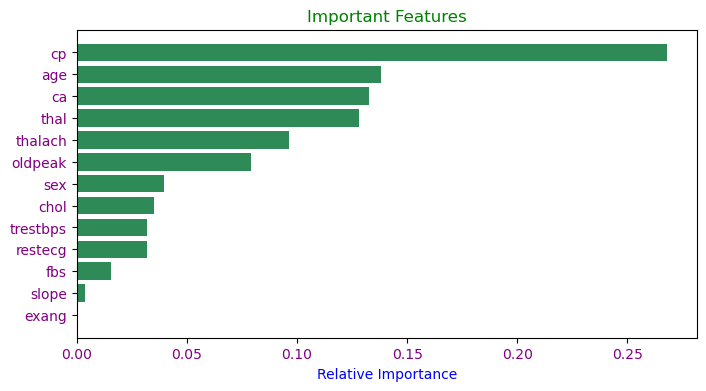

In [309]:
imp = dt.feature_importances_
indices = np.argsort(imp)
feature_names = list(X_train.columns)

plt.figure(figsize=(8,4))

plt.barh(range(len(indices)), imp[indices], color="seagreen", align="center")
plt.title("Important Features",color='green')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices],color='purple')
plt.xticks(color='purple')
plt.xlabel("Relative Importance",color='blue')
plt.show()

### Applying GridsearchCV on Decission Tree Model

In [310]:
from sklearn.model_selection import GridSearchCV

grid = {'criterion':["gini", "entropy", "log_loss"],
        'max_depth':[10,20,30],
        'min_samples_split':[2,3,5,7],
        'min_samples_leaf':[2,3,4,5],
        'min_impurity_decrease':[0.001,0.0001],
        }
grid_search = GridSearchCV(estimator = dt, param_grid = grid, cv = 10,n_jobs=-1,scoring='accuracy',verbose=1)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=4), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30],
                         'min_impurity_decrease': [0.001, 0.0001],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 5, 7]},
             scoring='accuracy', verbose=1)

In [311]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 4, 'min_samples_split': 2} 

DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.001,
                       min_samples_leaf=4, random_state=4)


##### Building model on best parameters

In [312]:
best_model_dt = grid_search.best_estimator_
best_model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.001,
                       min_samples_leaf=4, random_state=4)

**Accuracy of the Training and Test Data**

In [313]:
print("Accuracy of Train data: ",best_model_dt.score(X_train,y_train))
print("Accuracy of Test data: ",best_model_dt.score(X_test,y_test))

Accuracy of Train data:  0.921161825726141
Accuracy of Test data:  0.7868852459016393


In [314]:
ypred_train = best_model_dt.predict(X_train)
ypred_test = best_model_dt.predict(X_test)

In [315]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test)},index=['Decission Tree Tuned'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.871369,0.852459
Logistic Regression Tuned,0.871369,0.852459
LDA,0.867220,0.885246
LDA Tuned,0.850622,0.819672
Support Vector Classifier,0.858921,0.852459
SVC Tuned,0.879668,0.868852
KNN_4,0.858921,0.885246
KNN Tuned,0.842324,0.852459
Decission Trees,1.000000,0.803279
Decission Tree Tuned,0.921162,0.786885


In [316]:
imp = pd.DataFrame(best_model_dt.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False)
imp

,Imp
cp,0.346896
thal,0.165615
ca,0.149906
age,0.097346
thalach,0.068001
oldpeak,0.064289
restecg,0.057642
exang,0.026249
chol,0.019419
slope,0.004638


### Random Forest

In [317]:
from sklearn.ensemble import RandomForestClassifier

In [318]:
rf = RandomForestClassifier(n_estimators=1000,random_state=4)      # 100, 500, 1000, 2000,5000
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, random_state=4)

**Accuracy of Train and Test data**

In [319]:
print("Accuracy on Training data: ",rf.score(X_train,y_train))
print("Accuracy on Test data: ",rf.score(X_test,y_test))

Accuracy on Training data:  1.0
Accuracy on Test data:  0.8852459016393442


In [320]:
ypred_train = rf.predict(X_train)
ypred_test = rf.predict(X_test)

In [321]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test)},index=['Random Forest'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.871369,0.852459
Logistic Regression Tuned,0.871369,0.852459
LDA,0.867220,0.885246
LDA Tuned,0.850622,0.819672
Support Vector Classifier,0.858921,0.852459
SVC Tuned,0.879668,0.868852
KNN_4,0.858921,0.885246
KNN Tuned,0.842324,0.852459
Decission Trees,1.000000,0.803279
Decission Tree Tuned,0.921162,0.786885


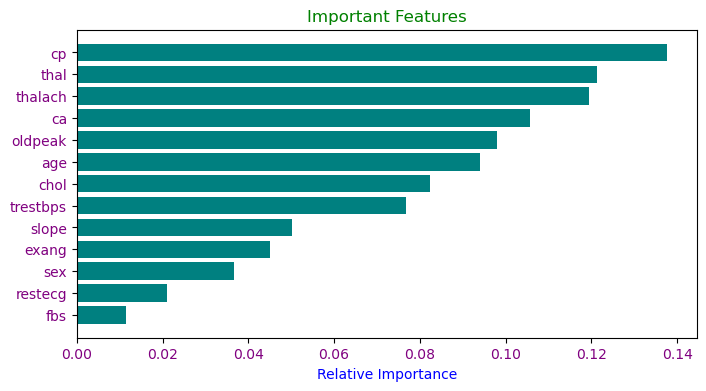

In [322]:
imp = rf.feature_importances_
indices = np.argsort(imp)
feature_names = list(X_train.columns)

plt.figure(figsize=(8,4))

plt.barh(range(len(indices)), imp[indices], color="teal")
plt.title("Important Features",color='green')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices],color='purple')
plt.xticks(color='purple')
plt.xlabel("Relative Importance",color='blue')
plt.show()

In [323]:
Param_grid = {
              'min_samples_split' : [10,20,30],
              'min_samples_leaf':[5,10,15],
              'max_depth':[5,10,15,20],'max_features' : ["sqrt", "log2"],
              'n_estimators':[50,100,150]
             }

In [324]:
grid_search = GridSearchCV(estimator=rf,param_grid=Param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=1000,
                                              random_state=4),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [50, 100, 150]})

In [325]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 30, 'n_estimators': 100} 

RandomForestClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=30,
                       random_state=4)


In [326]:
best_modelRF = grid_search.best_estimator_
best_modelRF.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=30,
                       random_state=4)

**Accuracy of Train and Test Data**

In [327]:
print("Accuracy on Train data: ",best_modelRF.score(X_train,y_train))
print("Accuracy on Test data: ",best_modelRF.score(X_test,y_test))

Accuracy on Train data:  0.8630705394190872
Accuracy on Test data:  0.8852459016393442


In [328]:
ypred_train = best_modelRF.predict(X_train)
ypred_test = best_modelRF.predict(X_test)

In [329]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test)},index=['RF Tuned'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.871369,0.852459
Logistic Regression Tuned,0.871369,0.852459
LDA,0.867220,0.885246
LDA Tuned,0.850622,0.819672
Support Vector Classifier,0.858921,0.852459
SVC Tuned,0.879668,0.868852
KNN_4,0.858921,0.885246
KNN Tuned,0.842324,0.852459
Decission Trees,1.000000,0.803279
Decission Tree Tuned,0.921162,0.786885


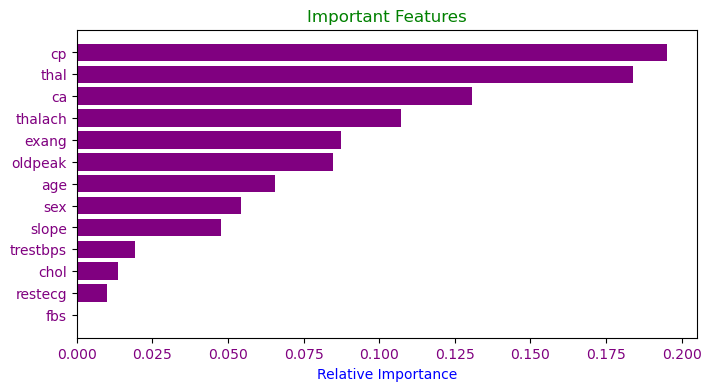

In [330]:
imp = best_modelRF.feature_importances_
indices = np.argsort(imp)
feature_names = list(X_train.columns)

plt.figure(figsize=(8,4))

plt.barh(range(len(indices)), imp[indices], color="purple")
plt.title("Important Features",color='green')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices],color='purple')
plt.xticks(color='purple')
plt.xlabel("Relative Importance",color='blue')
plt.show()

### Bagging Classifier

In [331]:
from sklearn.ensemble import BaggingClassifier

In [332]:
bgcl = BaggingClassifier(random_state=4)
bgcl.fit(X_train, y_train)

BaggingClassifier(random_state=4)

**Accuracy of Train and Test Dataset**

In [333]:
print("Accuracy of Train Data  : ",bgcl.score(X_train,y_train))
print("Accuracy of Test Data  : ",bgcl.score(X_test,y_test))

Accuracy of Train Data  :  0.9875518672199171
Accuracy of Test Data  :  0.8688524590163934


In [334]:
ypred_train = bgcl.predict(X_train)
ypred_test = bgcl.predict(X_test)

In [335]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test)},index=['Bagging Classifier'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.871369,0.852459
Logistic Regression Tuned,0.871369,0.852459
LDA,0.867220,0.885246
LDA Tuned,0.850622,0.819672
Support Vector Classifier,0.858921,0.852459
SVC Tuned,0.879668,0.868852
KNN_4,0.858921,0.885246
KNN Tuned,0.842324,0.852459
Decission Trees,1.000000,0.803279
Decission Tree Tuned,0.921162,0.786885


In [336]:
# Fitting the model with RF_model as base_estimator

bgcl_rf = BaggingClassifier(estimator=rf,random_state=4)
bgcl_rf.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(n_estimators=1000,
                                                   random_state=4),
                  random_state=4)

In [337]:
print("Accuracy of Train Data : ",bgcl_rf.score(X_train,y_train))
print("Accuracy of Test Data : ",bgcl_rf.score(X_test,y_test))

Accuracy of Train Data :  0.983402489626556
Accuracy of Test Data :  0.8688524590163934


### Applying GridsearchCV on Bagging

In [338]:
param_grid = {
              "max_samples": np.arange(0.2, 1, 0.1),
              "n_estimators": [40, 50, 60],
              "max_features": np.arange(0.2, 1, 0.1),
             }

In [339]:
grid_search = GridSearchCV(estimator=bgcl,param_grid=param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=4),
             param_grid={'max_features': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_samples': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': [40, 50, 60]})

In [340]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'max_features': 0.6000000000000001, 'max_samples': 0.2, 'n_estimators': 40} 

BaggingClassifier(max_features=0.6000000000000001, max_samples=0.2,
                  n_estimators=40, random_state=4)


In [341]:
best_model_bagging = grid_search.best_estimator_
best_model_bagging.fit(X_train,y_train)

BaggingClassifier(max_features=0.6000000000000001, max_samples=0.2,
                  n_estimators=40, random_state=4)

In [342]:
print("Accuracy on Train Data: ",best_model_bagging.score(X_train,y_train))
print("Accuracy on Test Data: ",best_model_bagging.score(X_test,y_test))

Accuracy on Train Data:  0.8921161825726142
Accuracy on Test Data:  0.819672131147541


In [343]:
ypred_train = best_model_bagging.predict(X_train)
ypred_test = best_model_bagging.predict(X_test)

In [344]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test)},index=['Bagging Classifier Tuned'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.871369,0.852459
Logistic Regression Tuned,0.871369,0.852459
LDA,0.867220,0.885246
LDA Tuned,0.850622,0.819672
Support Vector Classifier,0.858921,0.852459
SVC Tuned,0.879668,0.868852
KNN_4,0.858921,0.885246
KNN Tuned,0.842324,0.852459
Decission Trees,1.000000,0.803279
Decission Tree Tuned,0.921162,0.786885


### AdaBoost Classifier

In [345]:
from sklearn.ensemble import AdaBoostClassifier


In [346]:
ADB_model = AdaBoostClassifier(n_estimators=500,random_state=4)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=500, random_state=4)

In [347]:
print("Accuracy on Train Data: ",ADB_model.score(X_train,y_train))
print("Accuracy on Test Data: ",ADB_model.score(X_test,y_test))

Accuracy on Train Data:  1.0
Accuracy on Test Data:  0.7868852459016393


In [348]:
ypred_train = ADB_model.predict(X_train)
ypred_test = ADB_model.predict(X_test)

In [349]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test)},index=['Ada Boost Classifier'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.871369,0.852459
Logistic Regression Tuned,0.871369,0.852459
LDA,0.867220,0.885246
LDA Tuned,0.850622,0.819672
Support Vector Classifier,0.858921,0.852459
SVC Tuned,0.879668,0.868852
KNN_4,0.858921,0.885246
KNN Tuned,0.842324,0.852459
Decission Trees,1.000000,0.803279
Decission Tree Tuned,0.921162,0.786885


### GridSearchCV on ADA Boost:

In [350]:
Param_grid = { 'n_estimators' : [50,100,500,1000],
               'learning_rate' : [0.1,0.01,0.001,1.0],
               'algorithm' : ['SAMME', 'SAMME.R']
             }

In [351]:
grid_search = GridSearchCV(estimator=ADB_model,param_grid=Param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(n_estimators=500, random_state=4),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001, 1.0],
                         'n_estimators': [50, 100, 500, 1000]})

In [352]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50} 

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, random_state=4)


In [353]:
best_model_Adb = grid_search.best_estimator_
best_model_Adb.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, random_state=4)

In [354]:
print("Accuracy on Train Data: ",best_model_Adb.score(X_train,y_train))
print("Accuracy on Test Data: ",best_model_Adb.score(X_test,y_test))

Accuracy on Train Data:  0.8464730290456431
Accuracy on Test Data:  0.8852459016393442


In [355]:
ypred_train = best_model_Adb.predict(X_train)
ypred_test = best_model_Adb.predict(X_test)

In [356]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test)},index=['Ada Boost Classifier Tuned'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.871369,0.852459
Logistic Regression Tuned,0.871369,0.852459
LDA,0.867220,0.885246
LDA Tuned,0.850622,0.819672
Support Vector Classifier,0.858921,0.852459
SVC Tuned,0.879668,0.868852
KNN_4,0.858921,0.885246
KNN Tuned,0.842324,0.852459
Decission Trees,1.000000,0.803279
Decission Tree Tuned,0.921162,0.786885


### Gradient Boosting Classifier

In [359]:
from sklearn.ensemble import GradientBoostingClassifier

In [360]:
gbc_model=GradientBoostingClassifier(n_estimators=100,random_state=42)      # 1000 ---> 98%, 94%
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [361]:
print("Accuracy on Train Data: ",gbc_model.score(X_train,y_train))
print("Accuracy on Test Data: ",gbc_model.score(X_test,y_test))

Accuracy on Train Data:  0.995850622406639
Accuracy on Test Data:  0.819672131147541


In [362]:
ypred_train = gbc_model.predict(X_train)
ypred_test = gbc_model.predict(X_test)

In [363]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test)},index=['Gradient Boosting Classifier '])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.871369,0.852459
Logistic Regression Tuned,0.871369,0.852459
LDA,0.867220,0.885246
LDA Tuned,0.850622,0.819672
Support Vector Classifier,0.858921,0.852459
SVC Tuned,0.879668,0.868852
KNN_4,0.858921,0.885246
KNN Tuned,0.842324,0.852459
Decission Trees,1.000000,0.803279
Decission Tree Tuned,0.921162,0.786885


### GridSearchCV on Gradient Boost

In [364]:
Param_grid = {'n_estimators':[50,100,150,200],'criterion' : ['friedman_mse', 'squared_error'],
              'loss' : ['log_loss', 'exponential'],'max_features' : ['sqrt', 'log2'],
               'max_depth':[3,5],'max_leaf_nodes':[2,5]}

In [365]:
grid_search = GridSearchCV(estimator=gbc_model,param_grid=Param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [3, 5], 'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [2, 5],
                         'n_estimators': [50, 100, 150, 200]})

In [366]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'criterion': 'friedman_mse', 'loss': 'exponential', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'n_estimators': 100} 

GradientBoostingClassifier(loss='exponential', max_features='sqrt',
                           max_leaf_nodes=2, random_state=42)


In [367]:
best_model_gdb = grid_search.best_estimator_
best_model_gdb.fit(X_train,y_train)

GradientBoostingClassifier(loss='exponential', max_features='sqrt',
                           max_leaf_nodes=2, random_state=42)

**Accuracy of Train and Test Data**

In [423]:
print("Accuracy on Train Data: ",best_model_gdb.score(X_train,y_train))
print("Accuracy on Test Data: ",best_model_gdb.score(X_test,y_test))

Accuracy on Train Data:  0.8672199170124482
Accuracy on Test Data:  0.9016393442622951


In [424]:
ypred_train = best_model_gdb.predict(X_train)
ypred_test = best_model_gdb.predict(X_test)

In [370]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test)},index=['Gradient Boosting Tuned '])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.871369,0.852459
Logistic Regression Tuned,0.871369,0.852459
LDA,0.867220,0.885246
LDA Tuned,0.850622,0.819672
Support Vector Classifier,0.858921,0.852459
SVC Tuned,0.879668,0.868852
KNN_4,0.858921,0.885246
KNN Tuned,0.842324,0.852459
Decission Trees,1.000000,0.803279
Decission Tree Tuned,0.921162,0.786885


**Feature Importance**

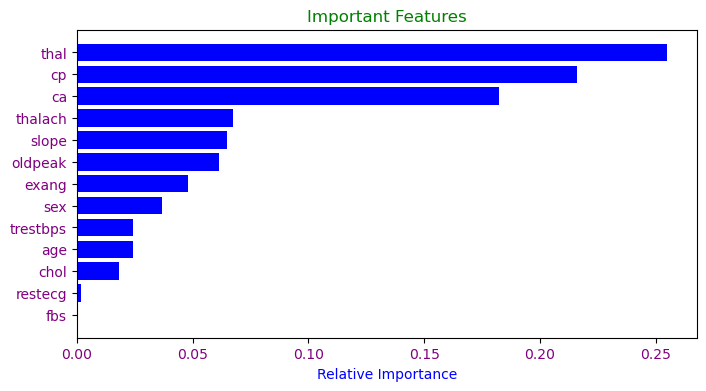

In [422]:
imp = best_model_gdb.feature_importances_
indices = np.argsort(imp)
feature_names = list(X_train.columns)

plt.figure(figsize=(8,4))
plt.barh(range(len(indices)), imp[indices], color='blue')
plt.title("Important Features",color='green')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices],color='purple')
plt.xticks(color='purple')
plt.xlabel("Relative Importance",color='blue')
plt.show()

### XGBoost Classifier

In [371]:
# import xgboost
from xgboost import XGBClassifier

In [372]:
xgb = XGBClassifier(eval_metric="logloss",random_state=42)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [373]:
print("Accuracy on Train Data: ",xgb.score(X_train,y_train))
print("Accuracy on Test Data: ",xgb.score(X_test,y_test))

Accuracy on Train Data:  1.0
Accuracy on Test Data:  0.8524590163934426


In [374]:
ypred_train = xgb.predict(X_train)
ypred_test = xgb.predict(X_test)

In [375]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test)},index=['XGBoost Classifier'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.871369,0.852459
Logistic Regression Tuned,0.871369,0.852459
LDA,0.867220,0.885246
LDA Tuned,0.850622,0.819672
Support Vector Classifier,0.858921,0.852459
SVC Tuned,0.879668,0.868852
KNN_4,0.858921,0.885246
KNN Tuned,0.842324,0.852459
Decission Trees,1.000000,0.803279
Decission Tree Tuned,0.921162,0.786885


### Applying GridsearchCV on XGBoost

In [376]:
param_grid = {
               "n_estimators": [50,100,200],  # np.arange(10, 100, 10),
               "scale_pos_weight": [5],  # [0, 1, 2, 5],
               "subsample": [0.5,1],  # [0.5, 0.7, 0.9, 1],
               "learning_rate": [0.01,0.2,0.2],  # [0.01, 0.1, 0.2, 0.05],
               "gamma": [1,3],  # [0, 1, 3],
               "colsample_bytree": [0.9,1],  # [0.5, 0.7, 0.9, 1],
               "colsample_bylevel": [0.5,1],  # [0.5, 0.7, 0.9, 1],
            }

In [377]:
grid_search = GridSearchCV(estimator=xgb,param_grid=param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bylevel': [0.5, 1],
                         'colsample_bytree': [0.9, 1], 'gamma': [1, 3],
                         'learning_rate': [0.01, 0.2, 0.2],
                         'n_estimators': [50, 100, 200],
                         'scale_pos_weight': [5], 'subsample': [0.5, 1]})

In [378]:
print(grid_search.best_params_,"\n")
print(grid_search.best_estimator_)

{'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 3, 'learning_rate': 0.2, 'n_estimators': 50, 'scale_pos_weight': 5, 'subsample': 1} 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=3,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [379]:
best_model_xgb = grid_search.best_estimator_
best_model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=3,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [380]:
print("Accuracy on Train Data: ",best_model_xgb.score(X_train,y_train))
print("Accuracy on Test Data: ",best_model_xgb.score(X_test,y_test))

Accuracy on Train Data:  0.8796680497925311
Accuracy on Test Data:  0.819672131147541


In [381]:
ypred_train = best_model_xgb.predict(X_train)
ypred_test = best_model_xgb.predict(X_test)

In [382]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test)},index=['XGBoost Tuned'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.871369,0.852459
Logistic Regression Tuned,0.871369,0.852459
LDA,0.867220,0.885246
LDA Tuned,0.850622,0.819672
Support Vector Classifier,0.858921,0.852459
SVC Tuned,0.879668,0.868852
KNN_4,0.858921,0.885246
KNN Tuned,0.842324,0.852459
Decission Trees,1.000000,0.803279
Decission Tree Tuned,0.921162,0.786885


### LightGBM classifier

In [383]:
import lightgbm

In [409]:
lgbm_model = lightgbm.LGBMClassifier(n_estimators=3000,random_state=4)
lgbm_model.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 131, number of negative: 110
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 241
[LightGBM] [Info] Number of data points in the train set: 241, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.543568 -> initscore=0.174717
[LightGBM] [Info] Start training from score 0.174717
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMClassifier(n_estimators=3000, random_state=4)

In [410]:
print("Accuracy on Train Data: ",lgbm_model.score(X_train,y_train))
print("Accuracy on Test Data: ",lgbm_model.score(X_test,y_test))

Accuracy on Train Data:  1.0
Accuracy on Test Data:  0.819672131147541


In [411]:
ypred_train = lgbm_model.predict(X_train)
ypred_test = lgbm_model.predict(X_test)

In [412]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test)},index=['Light GBM'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.871369,0.852459
Logistic Regression Tuned,0.871369,0.852459
LDA,0.867220,0.885246
LDA Tuned,0.850622,0.819672
Support Vector Classifier,0.858921,0.852459
SVC Tuned,0.879668,0.868852
KNN_4,0.858921,0.885246
KNN Tuned,0.842324,0.852459
Decission Trees,1.000000,0.803279
Decission Tree Tuned,0.921162,0.786885


In [417]:
lgbm_tuned = lightgbm.LGBMClassifier(learning_rate=0.04,max_depth=18,n_estimators=3000,subsample=0.7,num_leaves=31,random_state=42,colsample_bytree=0.7,min_data_in_leaf =55,reg_alpha=1.7,
                                    reg_lambda=1.11)
lgbm_tuned.fit(X_train,y_train)

[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 131, number of negative: 110
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 239
[LightGBM] [Info] Number of data points in the train set: 241, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.543568 -> initscore=0.174717
[LightGBM] [Info] Start training from score 0.174717
[LightGBM] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

LGBMClassifier(colsample_bytree=0.7, learning_rate=0.04, max_depth=18,
               min_data_in_leaf=55, n_estimators=3000, random_state=42,
               reg_alpha=1.7, reg_lambda=1.11, subsample=0.7)

In [418]:
print("Accuracy on Train Data: ",lgbm_tuned.score(X_train,y_train))
print("Accuracy on Test Data: ",lgbm_tuned.score(X_test,y_test))

[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Accuracy on Train Data:  0.8962655601659751
[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Accuracy on Test Data:  0.8688524590163934


In [419]:
ypred_train = lgbm_tuned.predict(X_train)
ypred_test = lgbm_tuned.predict(X_test)

[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [420]:
resultsDf1 = pd.DataFrame({'Train_Accuracy': accuracy_score(y_train,ypred_train),
                          'Test_Accuracy': accuracy_score(y_test,ypred_test)},index=['LightGBM Tuned'])
comp_table = pd.concat([comp_table,resultsDf1],axis=0)
comp_table

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.871369,0.852459
Logistic Regression Tuned,0.871369,0.852459
LDA,0.867220,0.885246
LDA Tuned,0.850622,0.819672
Support Vector Classifier,0.858921,0.852459
SVC Tuned,0.879668,0.868852
KNN_4,0.858921,0.885246
KNN Tuned,0.842324,0.852459
Decission Trees,1.000000,0.803279
Decission Tree Tuned,0.921162,0.786885


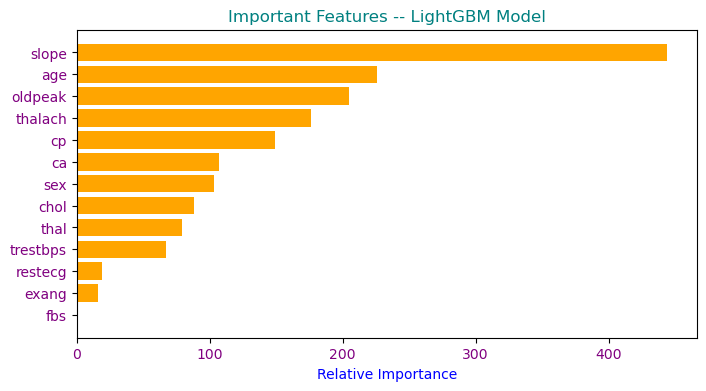

In [421]:
imp = lgbm_tuned.feature_importances_
indices = np.argsort(imp)
feature_names = list(X_train.columns)

plt.figure(figsize=(8,4))
plt.barh(range(len(indices)), imp[indices], color='orange')
plt.title("Important Features -- LightGBM Model",color='teal')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices],color='purple')
plt.xticks(color='purple')
plt.xlabel("Relative Importance",color='blue')
plt.show()

### Best Optimal Model

* Best Optimal model is Tuned Gradient Boosting Classifier model.
* The Accuracy in Train data is 86% and in Testing data Accuracy is 90%.

### Performance metrices of the most optimal model:

**Classification Report**

In [432]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [433]:
print('Classification Report of the Training data:\n\n',metrics.classification_report(y_train,ypred_train),'\n')
print('Classification Report of the Test data:\n\n',metrics.classification_report(y_test,ypred_test))

Classification Report of the Training data:

               precision    recall  f1-score   support

           0       0.88      0.83      0.85       110
           1       0.86      0.90      0.88       131

    accuracy                           0.87       241
   macro avg       0.87      0.86      0.87       241
weighted avg       0.87      0.87      0.87       241
 

Classification Report of the Test data:

               precision    recall  f1-score   support

           0       0.96      0.82      0.88        28
           1       0.86      0.97      0.91        33

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



**Insights:**

**---------------------------------------------Test set Tuned Model-------------------------------------------**

**Accuracy**

        * The Accuracy of model is 90%.
        * 90% of the Data points are identified correctly
        
**Recall : Represents the correctness of the Model in a particular class.**

        * Recall for class 1 (Risk) is 90% and Recall for class 0 (No Risk) is 83%.
        * 90% of those having Heart attack risk were correctly identified as risk by the model.
        * Out of all the patients having Heart attack risk, 90% of them are identified correctly as Risk.
        * Out of all the patients who are not at a Risk of Heart attack, 83% of them are identified correctly as No-Risk.
**Precision**

        * Precision for class 1 (Risk) is 86% and for class 0 (No-Risk) is 88%.
        * 86% of the patients predicted are actually having Heart attack risk Out of all the patients that are predicted as
          at Risk.
        * 88% of the patients predicted are actually at No - Risk out of all the patients predicted as no-Risk.

**Confusion Matrix**

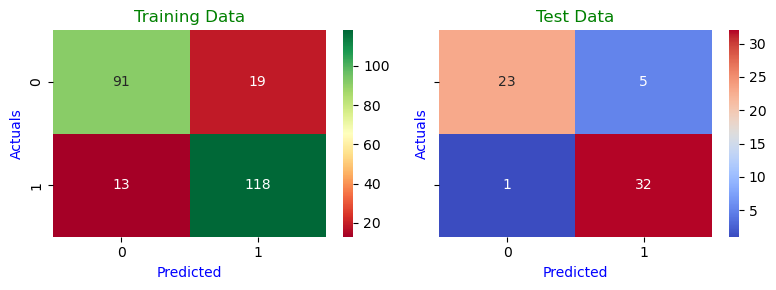

In [435]:
fig,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
fig.set_size_inches(8,3)
#Plotting confusion matrix for the different models for the Training Data     # plasma  RdYlGn
plt_0 = sns.heatmap((metrics.confusion_matrix(y_train,ypred_train)), annot=True, fmt='.5g',cmap='RdYlGn',ax=a[0][0])
a[0][0].set_title('Training Data',color='green')
a[0][0].set_xlabel('Predicted',color='blue')
a[0][0].set_ylabel('Actuals',color='blue')


#Plotting confusion matrix for the different models for the Test Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ypred_test)), annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data',color='green');
a[0][1].set_xlabel('Predicted',color='blue')
a[0][1].set_ylabel('Actuals',color='blue')

fig.tight_layout()
plt.show()

**Measuring and Plotting AUC-ROC Curve**

AUC for the Training Data: 0.939
AUC for the Test Data: 0.967


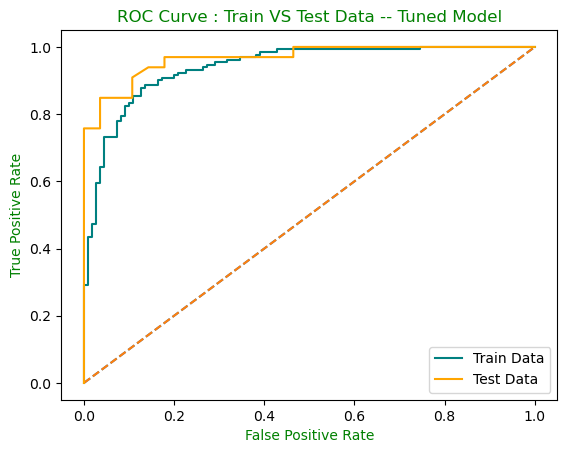

In [436]:
# AUC and ROC for the training data ~ Repaeter Operator Curve
# calculate AUC
probs = best_model_gdb.predict_proba(X_train)[:,1]
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr,label = 'Train Data',color='teal')

# AUC and ROC for the test data

# calculate AUC
probs1 = best_model_gdb.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test,probs1)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, label='Test Data',color='orange')

plt.title("ROC Curve : Train VS Test Data -- Tuned Model",color='green')
plt.xlabel('False Positive Rate',color='green')
plt.ylabel('True Positive Rate' ,color='green')
# show the plot
plt.legend(loc='best')
plt.show()

**Observations:**

* AUC for Train data is 93% and AUC for Test data is 96%.
* The AUC & ROC curve shows that it is covering almost the same area for Train and Test data. Therefore, this is considered a      Generalized good model. 
* Also the AUC score is high and is able to distinguish between Positive and Negative classes vey well.


**Insights:**

* Optimized Tuned GDB Model is performing better with highest AUC score of 96%.
* So we can say that these Models are able to Seperate between the Risk and No-Risk Classses Very well.
* These models can be considered a Good Generalized models.

**Business Insights, Implications and Recommendations**

* The 1st five Important features of Tuned GDB model are: thal, cp, ca, thalac & slope.
* These 5 features are Contributing most towards the Accuracy of the Model.
* Since these 5 features are contributing most towards the Accuracy, the business should ensure that these features should not contain any Anomalies, Null values or any kind of unwanted characters as a part of these columns in the future.
* Also, we should make sure these 5 features are made compulsory for :

        - predicting Heart attack Risk
        - for model building and 
        - accurate data are captured.
